<a href="https://colab.research.google.com/github/dulaldipak/Data_mining_Fifa_player_project/blob/master/deep_learning_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project on Vegetable Image Data Set
### This project is vegetable detection and recognition using CNN and Transfer Learning
##### Data LInk https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
## Citation for the data: https://www.researchgate.net/publication/352846889_DCNN-Based_Vegetable_Image_Classification_Using_Transfer_Learning_A_Comparative_Study

 **Import Libraries**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Input,Dense,Flatten,GlobalAveragePooling2D,Dropout
import os,pathlib,io
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random



In [2]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

**Connect with Drive**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Load Training, Testing and Validation images from the drive**

In [4]:
train = '/content/gdrive/MyDrive/deep_learning_project/Vegetable Images/train'
test = '/content/gdrive/MyDrive/deep_learning_project/Vegetable Images/test'
val = '/content/gdrive/MyDrive/deep_learning_project/Vegetable Images/validation'

**Count the Number of Images for each categories**

In [5]:
def count_files(rootdir):
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))
 
count_files(os.path.join(train)) # counts Training images
#count_files(os.path.join(test)) # counts testing images
#count_files(os.path.join(val))   # counts validation images

There are 1000 files in Tomato
There are 1000 files in Cucumber
There are 1000 files in Papaya
There are 1005 files in Pumpkin
There are 1000 files in Potato
There are 1000 files in Radish
There are 1000 files in Cauliflower
There are 1000 files in Broccoli
There are 1000 files in Capsicum
There are 1000 files in Carrot
There are 1000 files in Cabbage
There are 1000 files in Brinjal
There are 1000 files in Bottle_Gourd
There are 1000 files in Bean
There are 1000 files in Bitter_Gourd


**VIsualizing Some Images**

                         Sample Training Images                        



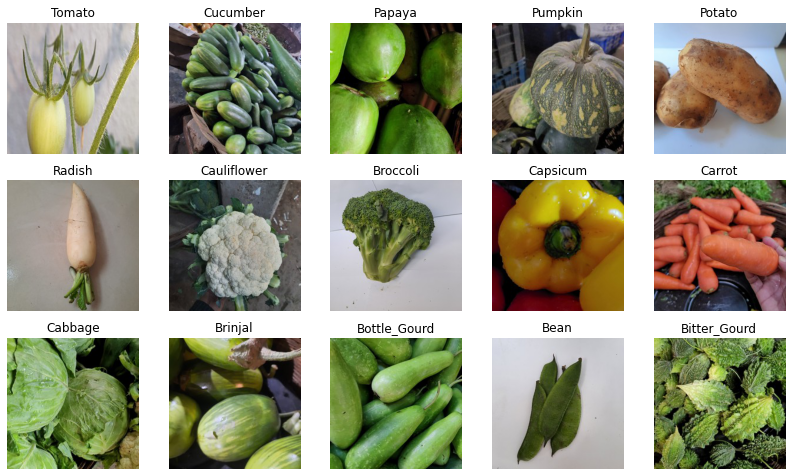

In [6]:
print('\033[1m' + '                         Sample Training Images                        ' + '\033[0m\n')
def plot_images(images):
    
    # Create a figure
    plt.figure(figsize=(14, 14))
    for i, cat in enumerate(images):
        
        # Load images for the ith category
        image_path = train + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(5,5, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(os.listdir(train))

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')
test_data = test_datagen.flow_from_directory(test,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                             shuffle=False)
val_data = valid_datagen.flow_from_directory(val,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 15005 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [8]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Nadam

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense


model = tf.keras.Sequential([
    Input(shape=(224,224,3)),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(2),
    Dropout(.2),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(2),
    Dropout(.2),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(2),
    Dropout(.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(15,activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer='RMSprop',
             metrics=['accuracy'])
    
history = model.fit(train_data,
                     epochs=10,
                     steps_per_epoch=50,
                     validation_data=val_data,
                     validation_steps=50)

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 2.7979 - accuracy: 0.1437

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense


model = tf.keras.Sequential([
    Input(shape=(224,224,3)),
    Conv2D(64,3,activation='tanh'),
    MaxPooling2D(2),
    Dropout(.2),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(2),
    Dropout(.2),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(2),
    Dropout(.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(15,activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(learning_rate = 0.001),
             metrics=['accuracy'])
    
history = model.fit(train_data,
                     epochs=10,
                     steps_per_epoch=len(train_data),
                     validation_data=val_data,
                     validation_steps=len(val_data))

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense


model = tf.keras.Sequential([
    Input(shape=(224,224,3)),
    Conv2D(64,3,activation='tanh'),
    MaxPooling2D(2),
    Dropout(.2),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(2),
    Dropout(.2),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(2),
    Dropout(.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(15,activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])
    
history = model.fit(train_data,
                     epochs=10,
                     steps_per_epoch=len(train_data),
                     validation_data=val_data,
                     validation_steps=len(val_data))